In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import matplotlib.image as image
import urllib.request
from PIL import Image

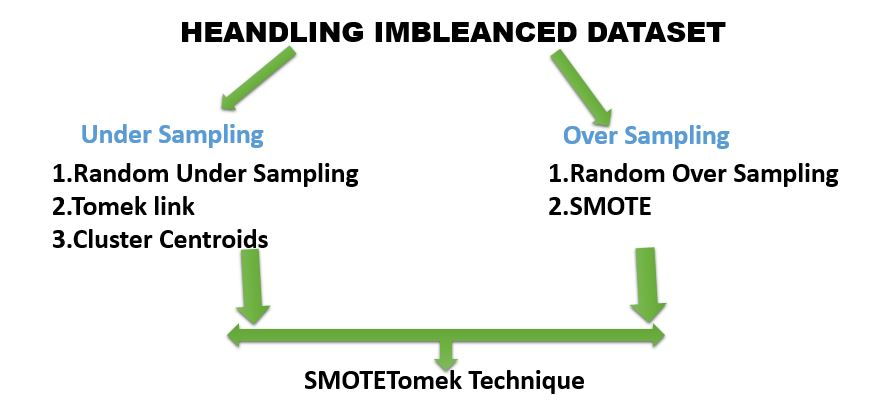

In [3]:
from IPython.display import display, Image
display(Image(filename='../input/imbleanced-data/imb.JPG'))

In [4]:
df= pd.read_csv('../input/diabetes-data-set/diabetes.csv')

In [5]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [7]:
# under random sampling 

In [8]:
count0,count1 = df['Outcome'].value_counts()

In [9]:
count1

268

In [10]:
count0

500

In [11]:
class0 = df[df['Outcome'] == 0]
class1 = df[df['Outcome']==1]

In [12]:
sample = class0.sample(count1)

In [13]:
undersample = pd.concat([sample,class1],axis = 0)

In [14]:
undersample['Outcome'].value_counts()

0    268
1    268
Name: Outcome, dtype: int64

In [15]:
#over sampling

In [16]:
sample2 = class1.sample(count0,replace = True)

In [17]:
oversample = pd.concat([sample2,class0],axis = 0)

In [18]:
oversample['Outcome'].value_counts()

1    500
0    500
Name: Outcome, dtype: int64

In [19]:
x = df.iloc[:,:-1]

In [20]:
y = df['Outcome']

In [21]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [22]:
randomunder = RandomUnderSampler()
randomunder.fit(x,y)

RandomUnderSampler()

In [23]:
xsample,ysample =randomunder.fit_resample(x,y)

In [24]:
ysample.value_counts()

0    268
1    268
Name: Outcome, dtype: int64

In [25]:
oversample = RandomOverSampler()
oversample.fit(x,y)
xsample1,xsample2 = oversample.fit_resample(x,y)

In [26]:
xsample2.value_counts()

1    500
0    500
Name: Outcome, dtype: int64

# Tomeklinks

![](https://th.bing.com/th/id/R.39c0f94cbe7ea3162713d0b00fac912b?rik=P%2fnHnOigPtAIqA&pid=ImgRaw&r=0)

In [27]:
from imblearn.under_sampling import TomekLinks

In [28]:
t = TomekLinks()
t.fit(x,y)

TomekLinks()

In [29]:
xsample3,ysample3 = t.fit_resample(x,y)

In [30]:
ysample3.value_counts()

0    445
1    268
Name: Outcome, dtype: int64

In [31]:
#smote

In [32]:
from imblearn.over_sampling import SMOTE

In [33]:
SM = SMOTE()

In [34]:
SM.fit(x,y)


SMOTE()

In [35]:
xsampl4,ysample4 = SM.fit_resample(x,y)

In [36]:
ysample4.value_counts()

1    500
0    500
Name: Outcome, dtype: int64

In [37]:
#smotetomek

In [38]:
from imblearn.combine import SMOTETomek

In [39]:
ssmm = SMOTETomek()
ssmm.fit(x,y)

SMOTETomek()

In [40]:
xsampl5,ysample5 = ssmm.fit_resample(x,y)

In [41]:
ysample5.value_counts()

1    476
0    476
Name: Outcome, dtype: int64